## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: GM12878
# EMBRACENET

da fare 
- sistema selezione augmentation in embracenet
- crea grafici AUPRC reti

In [2]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# create a database to store optuna studies with sqlite backend
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [4]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [5]:
cell_line = CELL_LINES[1]
cell_line

'GM12878'

---

In [19]:
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline
from BIOINF_tesi.models import EmbraceNetMultimodal
from BIOINF_tesi.models.utils import Kfold_CV_Multimodal

In [20]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [21]:
task = TASKS[0]

In [22]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [23]:
model=EmbraceNetMultimodal

In [24]:
# IMBALANCED
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (45928) in class 0 will be larger than the number of samples in the majority class (class #0 -> 22964)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:35:30,393] Using an existing study with name 'GM12878_active_E_vs_inactive_E_EmbraceNetMultimodal_1' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (68964) in class 0 will be larger than the number of samples in the majority class (class #0 -> 3

Study statistics: 
  Number of finished trials:  4
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.4607092562351971
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.7
    embracement_size: 768
    lr: 0.0014163500990177044
    n_post_layers: 2
    n_units_l0: 256
    n_units_l1: 32
    optimizer: Nadam
    selection_probabilities_FFNN: 0.7143464988688167
    weight_decay: 0.014671574281262952

===============> MODEL TESTING
AUPRC test score: 0.18390019860973186


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (45834) in class 0 will be larger than the number of samples in the majority class (class #0 -> 22917)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:36:07,072] Using an existing study with name 'GM12878_active_E_vs_inactive_E_EmbraceNetMultimodal_1_2' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (68940) in class 0 will be larger than the number of samples in the majority class (class #0 ->

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.44518755129481785
  Params: 
    dropout_l0: 0.0
    embracement_size: 1024
    lr: 0.0001514902370309448
    n_post_layers: 1
    n_units_l0: 32
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.33199496686320185
    weight_decay: 0.00593096652747379

===============> MODEL TESTING
AUPRC test score: 0.18317775571002978


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (45760) in class 0 will be larger than the number of samples in the majority class (class #0 -> 22880)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:36:41,579] Using an existing study with name 'GM12878_active_E_vs_inactive_E_EmbraceNetMultimodal_1_2_3' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (68880) in class 0 will be larger than the number of samples in the majority class (class #0 

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.43014428418820166
  Params: 
    dropout_l0: 0.7
    dropout_l1: 0.5
    embracement_size: 768
    lr: 0.000251198498547515
    n_post_layers: 2
    n_units_l0: 256
    n_units_l1: 16
    optimizer: Adam
    selection_probabilities_FFNN: 0.3589853020014905
    weight_decay: 0.008412944308901871

===============> MODEL TESTING
AUPRC test score: 0.18228401191658392



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.18312


In [25]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [26]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [27]:
task = TASKS[1]
task

'active_P_vs_inactive_P'

In [28]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [29]:
model=EmbraceNetMultimodal

In [30]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:37:05,783] Using an existing study with name 'GM12878_active_P_vs_inactive_P_EmbraceNetMultimodal_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.34462553173781285
  Params: 
    dropout_l0: 0.5
    embracement_size: 768
    lr: 2.7155251111977183e-05
    n_post_layers: 1
    n_units_l0: 64
    optimizer: Nadam
    selection_probabilities_FFNN: 0.7597036312707471
    weight_decay: 0.0015647638539830712

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:37:06,080] Using an existing study with name 'GM12878_active_P_vs_inactive_P_EmbraceNetMultimodal_1_2' instead of creating a new one.


AUPRC test score: 0.28947737131756096


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.34826824798737227
  Params: 
    embracement_size: 768
    lr: 0.000592866454034238
    n_post_layers: 0
    optimizer: Nadam
    selection_probabilities_FFNN: 0.7961937176732858
    weight_decay: 0.0016687257704526097

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:37:06,372] Using an existing study with name 'GM12878_active_P_vs_inactive_P_EmbraceNetMultimodal_1_2_3' instead of creating a new one.


AUPRC test score: 0.33234641855953406


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.35065861499192486
  Params: 
    dropout_l0: 0.3
    embracement_size: 512
    lr: 0.002072687723821822
    n_post_layers: 1
    n_units_l0: 64
    optimizer: Adam
    selection_probabilities_FFNN: 0.5353640468972227
    weight_decay: 0.0002169366165641026

===============> MODEL TESTING
AUPRC test score: 0.1401492261231056



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.25399


In [31]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [32]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [33]:
task = TASKS[2]
task

'active_E_vs_active_P'

In [34]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [35]:
model=EmbraceNetMultimodal

In [36]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:37:06,762] Using an existing study with name 'GM12878_active_E_vs_active_P_EmbraceNetMultimodal_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8036239435030615
  Params: 
    embracement_size: 768
    lr: 0.0006797329345499287
    n_post_layers: 0
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.9770079466670564
    weight_decay: 0.0004100799516307471

===============> MODEL TESTING
AUPRC test score: 0.45504347198952866




/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:37:06,988] Using an existing study with name 'GM12878_active_E_vs_active_P_EmbraceNetMultimodal_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8288776102362345
  Params: 
    embracement_size: 768
    lr: 0.00015356833454560585
    n_post_layers: 0
    optimizer: Adam
    selection_probabilities_FFNN: 0.1723306107717758
    weight_decay: 0.0023967857211884347

===============> MODEL TESTING
AUPRC test score: 0.4502885232211963


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:37:07,350] Using an existing study with name 'GM12878_active_E_vs_active_P_EmbraceNetMultimodal_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8054509732194604
  Params: 
    dropout_l0: 0.0
    embracement_size: 768
    lr: 1.030873933619264e-05
    n_post_layers: 1
    n_units_l0: 32
    optimizer: Adam
    selection_probabilities_FFNN: 0.30891452441408207
    weight_decay: 0.0005868214431259713

===============> MODEL TESTING
AUPRC test score: 0.46086181669566445



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.4554


In [37]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [38]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [39]:
task = TASKS[3]
task

'inactive_E_vs_inactive_P'

In [40]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [41]:
model=EmbraceNetMultimodal

In [42]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:37:08,877] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_EmbraceNetMultimodal_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5604191768171628
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.5
    embracement_size: 512
    lr: 0.0003715513880171705
    n_post_layers: 2
    n_units_l0: 32
    n_units_l1: 64
    optimizer: Adam
    selection_probabilities_FFNN: 0.24733114219135854
    weight_decay: 0.00010434490224358441

===============> MODEL TESTING
AUPRC test score: 0.3752920455759128


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:37:09,213] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_EmbraceNetMultimodal_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5679750060183455
  Params: 
    embracement_size: 768
    lr: 0.0027486009498066985
    n_post_layers: 0
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.8569485413081509
    weight_decay: 0.00013778511379777857

===============> MODEL TESTING
AUPRC test score: 0.3787527382988121


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:37:09,509] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_EmbraceNetMultimodal_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5558812414242768
  Params: 
    dropout_l0: 0.5
    dropout_l1: 0.3
    embracement_size: 768
    lr: 7.245188693125214e-05
    n_post_layers: 2
    n_units_l0: 64
    n_units_l1: 32
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.3191858013026133
    weight_decay: 0.031319294966619254

===============> MODEL TESTING
AUPRC test score: 0.37885407315133823



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.37763


In [43]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [44]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [45]:
task = TASKS[4]
task

'active_EP_vs_inactive_rest'

In [46]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [47]:
model=EmbraceNetMultimodal

In [48]:
# IMBALANCED
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (122356) in class 0 will be larger than the number of samples in the majority class (class #0 -> 61178)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:38:22,221] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_EmbraceNetMultimodal_1' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (183700) in class 0 will be larger than the number of samples in the majority class (class #

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3181775631214218
  Params: 
    dropout_l0: 0.5
    embracement_size: 512
    lr: 0.0019996115059802057
    n_post_layers: 1
    n_units_l0: 32
    optimizer: Nadam
    selection_probabilities_FFNN: 0.8647668822578927
    weight_decay: 0.0009210311219080063

===============> MODEL TESTING
AUPRC test score: 0.16128386892118496


>>> ITERATION N. 2


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (122004) in class 0 will be larger than the number of samples in the majority class (class #0 -> 61002)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:41:59,064] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_EmbraceNetMultimodal_1_2' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (183166) in class 0 will be larger than the number of samples in the majority class (class


===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.322914901775802
  Params: 
    embracement_size: 512
    lr: 0.0003228481535287783
    n_post_layers: 0
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.318878988810556
    weight_decay: 0.00014316771683214874

===============> MODEL TESTING
AUPRC test score: 0.2321482733257063


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (122148) in class 0 will be larger than the number of samples in the majority class (class #0 -> 61074)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 11:45:58,944] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_EmbraceNetMultimodal_1_2_3' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (183298) in class 0 will be larger than the number of samples in the majority class (cla

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3144302563935103
  Params: 
    dropout_l0: 0.5
    embracement_size: 768
    lr: 0.00023585183553870867
    n_post_layers: 1
    n_units_l0: 32
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.7326694979106152
    weight_decay: 0.04261375803760096

===============> MODEL TESTING
AUPRC test score: 0.15621871088861075



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.18322


In [49]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [50]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

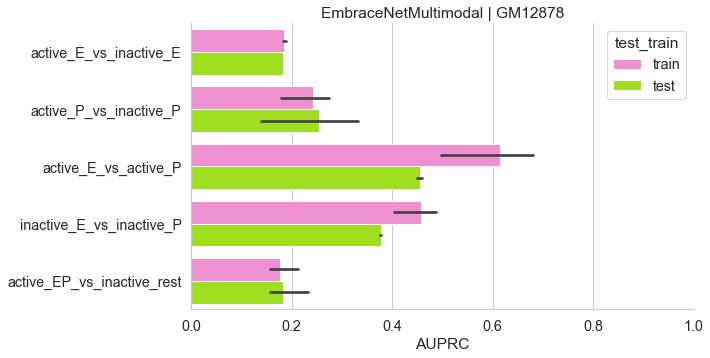

In [51]:
from BIOINF_tesi.models.utils import plot_scores
plot_scores(cells=cell_line, models=['EmbraceNetMultimodal'])

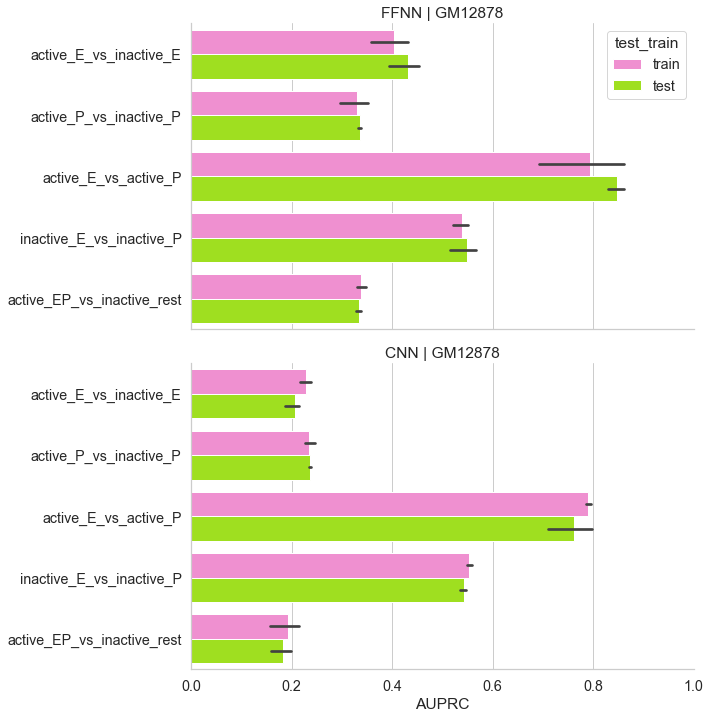

In [52]:
plot_scores(cells=cell_line)

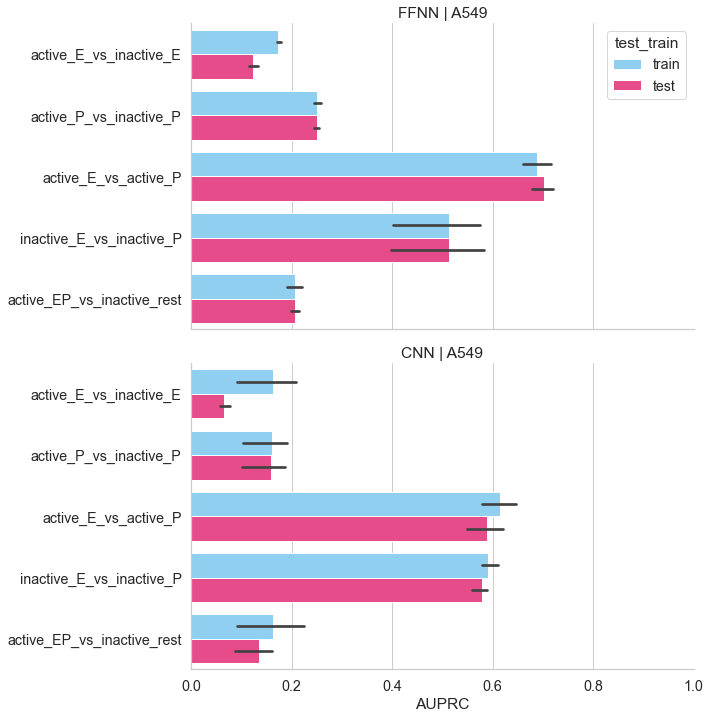

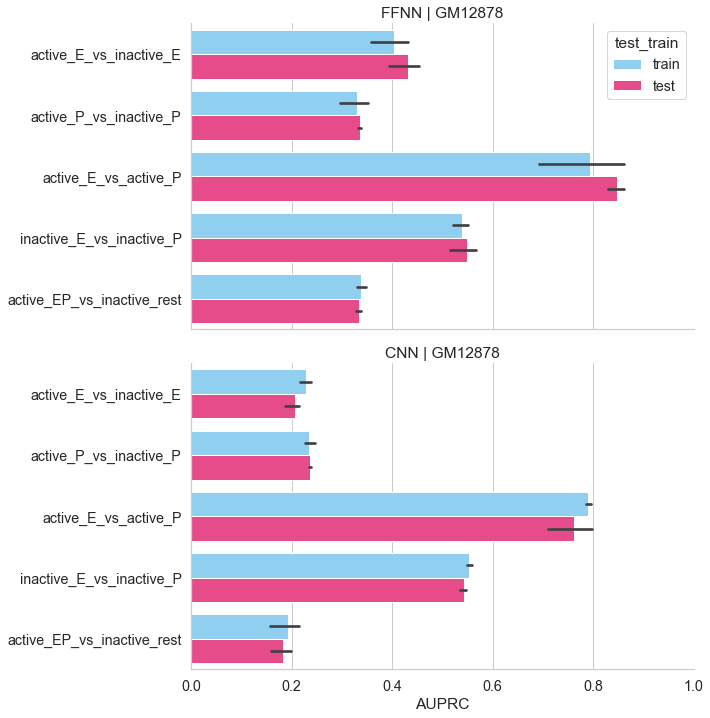

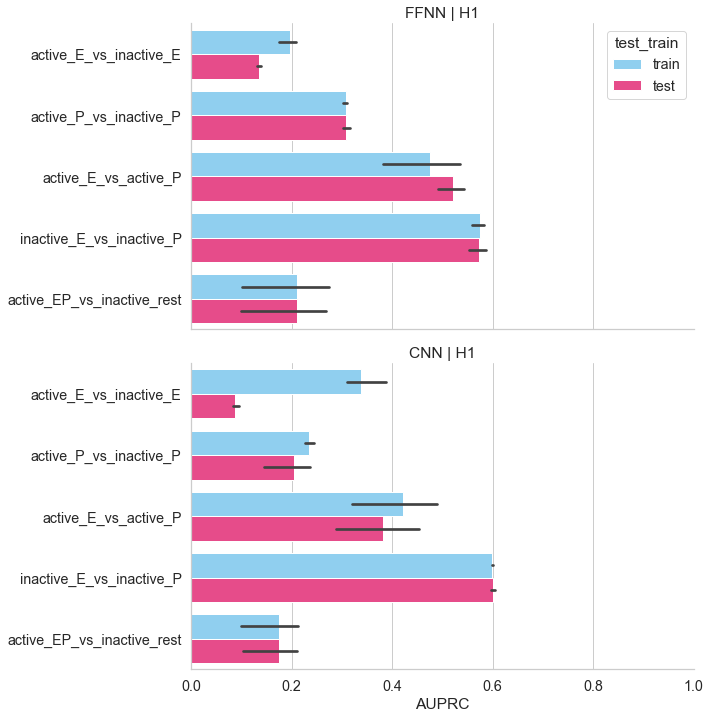

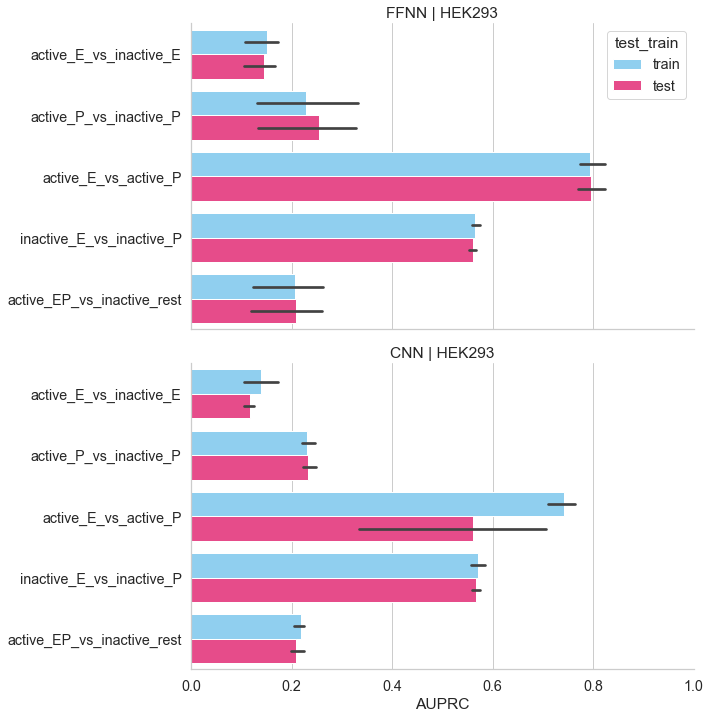

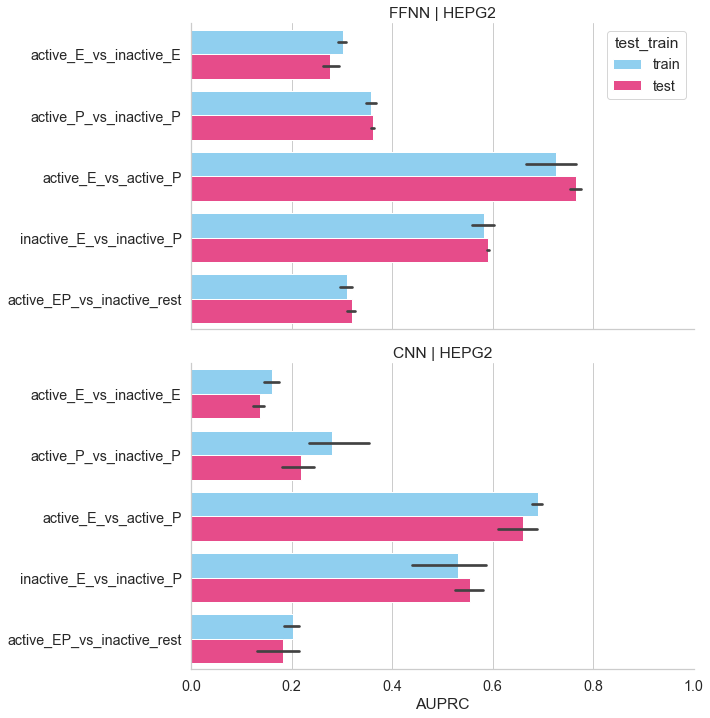

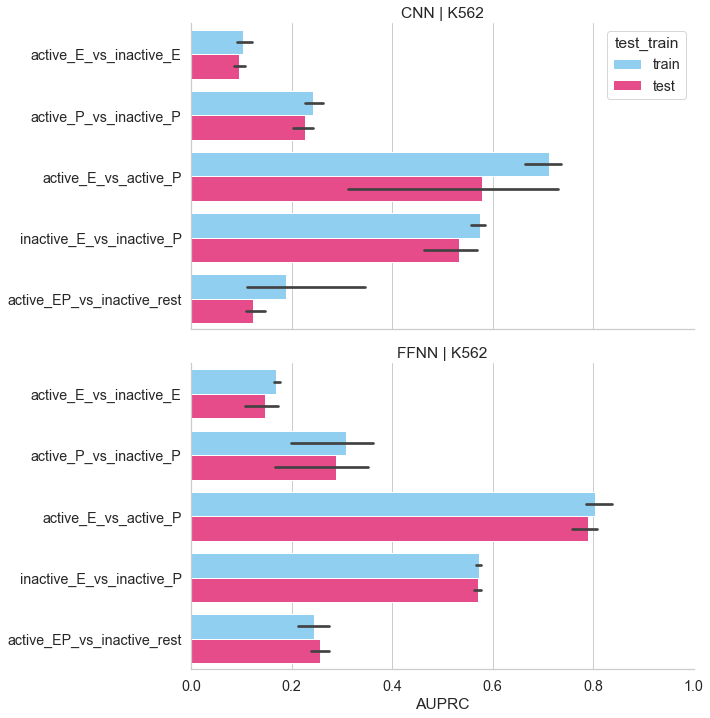

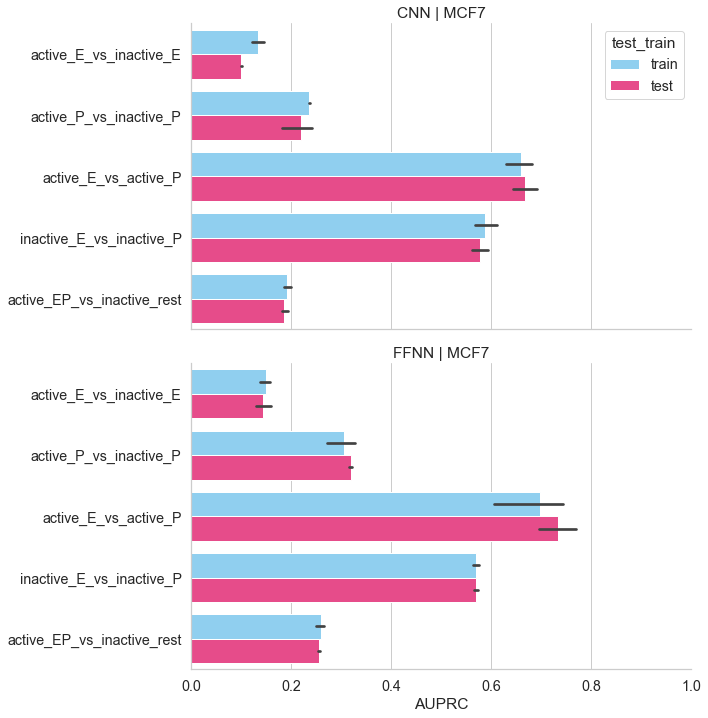

In [8]:
from BIOINF_tesi.models.utils import plot_scores
for cell in CELL_LINES:
    plot_scores(cells=cell, palette=0)